### Building Chicago Transit Demand Map

In [1]:
# Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from census import Census
from us import states
from census.core import ACSClient

# Patch the ACSClient to handle 'long' data type
def _field_type(self, field, year):
    types = {
        'int': int,
        'float': float,
        'string': str,
        'long': int  # Add this line
    }
    return types.get(field, str)

ACSClient._field_type = _field_type

# Initialize Census API with your API key
c = Census("5dc8bf38af7b9e4766c7afba29c4ab08c539ec5f")

# Access ACS 5-Year Estimates data for Cook County, Illinois
data = c.acs5.state_county_tract(
    fields=(
        'B02001_001E', 'B02001_002E', 'B02001_003E', 'B02001_004E', 'B02001_005E', 'B02001_006E',
        'B02001_007E', 'B02001_008E', 'B19013_001E', 'B23001_001E', 'B08141_001E', 'B08141_002E',
        'B08141_016E', 'B23001_001E', 'B25064_001E', 'B05001_001E', 'B05001_006E', 'B15001_001E',
        'B15002_001E', 'B15002_002E', 'B15002_019E', 'B15002_011E', 'B15002_028E', 'B15002_015E',
        'B15002_032E', 'B15002_016E', 'B15002_033E', 'B11005_001E', 'B11005_003E', 'B11005_005E',
        'B11005_008E', 'B11005_010E', 'B11007_001E', 'B11007_002E', 'B11007_004E', 'B11007_006E',
        'B16001_001E', 'B16001_002E', 'B16001_003E', 'B16001_004E', 'B16001_007E', 'B16001_037E',
        'B16001_043E', 'B16001_046E', 'B16001_064E', 'B18101_001E', 'B18101_002E', 'B18101_003E',
        'B08201_001E', 'B08201_002E', 'B08201_003E'
    ),  
    state_fips=states.IL.fips,  # FIPS code for Illinois
    county_fips='031',  # FIPS code for Cook County
    tract='*'  # Get all tracts
)

# Convert the data to a DataFrame
data = pd.DataFrame(data)

# Rename the columns for better readability
data = data.rename(columns={
    'B02001_001E': 'Total_Population',
    'B02001_002E': 'White',
    'B02001_003E': 'Black',
    'B02001_004E': 'Native_American_Alaska_Native',
    'B02001_005E': 'Asian',
    'B02001_006E': 'Native_Hawaiian_Pacific_Islander',
    'B02001_007E': 'Other',
    'B02001_008E': 'Two_or_more_races',
    'B19013_001E': 'Median_Household_Income',
    'B23001_001E': 'Employed',
    'B08141_001E': 'Total_Commute',
    'B08141_002E': 'Commute_Drove_Alone',
    'B08141_016E': 'Commute_Public_Transportation',
    'B08201_001E': 'Total_Households',
    'B08201_002E': 'Zero_vehicles_available',
    'B08201_003E': '1_vehicle_available',
    'B23001_001E': 'Labor_Force',
    'B25064_001E': 'Median_Gross_Rent',
    'B05001_001E': 'US_Citizen',
    'B05001_006E': 'Not_a_US_Citizen',
    'B15001_001E': 'Education_status',
    'B15002_001E': 'Total_Population_25_and_Over',
    'B15002_002E': 'Male_Total',
    'B15002_019E': 'Female_Total',
    'B15002_011E': 'Male_High_School_Graduate',
    'B15002_028E': 'Female_High_School_Graduate',
    'B15002_015E': 'Male_Bachelor_Degree',
    'B15002_032E': 'Female_Bachelor_Degree',
    'B15002_016E': 'Male_Master_Degree',
    'B15002_033E': 'Female_Master_Degree',
    'B11005_003E': 'Households_with_Own_Children_Under_18',
    'B11005_005E': 'Married_Couple_Families_with_Own_Children_Under_18',
    'B11005_008E': 'Male_Householder_with_Own_Children_Under_18',
    'B11005_010E': 'Female_Householder_with_Own_Children_Under_18',
    'B11007_002E': 'Households_with_One_or_More_People_65_and_Over',
    'B11007_004E': 'Family_Households_with_One_or_More_People_65_and_Over',
    'B11007_006E': 'Nonfamily_Households_with_One_or_More_People_65_and_Over',
    'B16001_001E': 'Total_Population_5_and_Over',
    'B16001_002E': 'Speak_Only_English',
    'B16001_003E': 'Speak_Other_Languages',
    'B16001_004E': 'Speak_Spanish',
    'B16001_007E': 'Speak_French',
    'B16001_037E': 'Speak_Chinese',
    'B16001_043E': 'Speak_Korean',
    'B16001_046E': 'Speak_Vietnamese',
    'B16001_064E': 'Speak_Arabic',
    'B18101_001E': 'Total_Disability_Status',
    'B18101_002E': 'Total_With_Disability',
    'B18101_003E': 'Total_Without_Disability'
})

data = data.fillna(0)

# Convert columns to numeric where applicable
numeric_columns = ['Total_Population', 'White', 'Black', 'Native_American_Alaska_Native',
                   'Asian', 'Native_Hawaiian_Pacific_Islander', 'Other',
                   'Two_or_more_races', 'Total_Households', 'Households_with_Own_Children_Under_18',
                   'Married_Couple_Families_with_Own_Children_Under_18',
                   'Male_Householder_with_Own_Children_Under_18',
                   'Female_Householder_with_Own_Children_Under_18',
                   'Households_with_One_or_More_People_65_and_Over',
                   'Family_Households_with_One_or_More_People_65_and_Over',
                   'Nonfamily_Households_with_One_or_More_People_65_and_Over',
                   'Total_Population_5_and_Over', 'Speak_Only_English',
                   'Speak_Other_Languages', 'Speak_Spanish', 'Speak_French',
                   'Speak_Chinese', 'Speak_Korean', 'Speak_Vietnamese', 'Speak_Arabic',
                   'Total_Disability_Status', 'Total_With_Disability',
                   'Total_Without_Disability', 'Labor_Force', 'Total_Commute',
                   'Commute_Drove_Alone', 'Commute_Public_Transportation',
                   'Median_Gross_Rent', 'Zero_vehicles_available', '1_vehicle_available',
                   'Male_High_School_Graduate', 'Female_High_School_Graduate','Male_Bachelor_Degree','Female_Bachelor_Degree',
                  'Male_Master_Degree', 'Female_Master_Degree']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the percentage of the population that is white, black, etc.
data['Percent_White'] = (data['White'] / data['Total_Population']) * 100
data['Percent_Black'] = (data['Black'] / data['Total_Population']) * 100
data['Percent_Native_American_Alaska_Native'] = (data['Native_American_Alaska_Native'] / data['Total_Population']) * 100
data['Percent_Asian'] = (data['Asian'] / data['Total_Population']) * 100
data['Percent_Native_Hawaiian_Pacific_Islander'] = (data['Native_Hawaiian_Pacific_Islander'] / data['Total_Population']) * 100
data['Percent_Other'] = (data['Other'] / data['Total_Population']) * 100
data['Percent_Two_or_more_races'] = (data['Two_or_more_races'] / data['Total_Population']) * 100
data['Percent_non_white'] = (data['Total_Population'] - data['White']) * 100

# Calculate the percentage of households with different characteristics
data['Percent_Households_with_Own_Children_Under_18'] = (data['Households_with_Own_Children_Under_18'] / data['Total_Households']) * 100
data['Percent_Married_Couple_Families_with_Own_Children_Under_18'] = (data['Married_Couple_Families_with_Own_Children_Under_18'] / data['Total_Households']) * 100
data['Percent_Male_Householder_with_Own_Children_Under_18'] = (data['Male_Householder_with_Own_Children_Under_18'] / data['Total_Households']) * 100
data['Percent_Female_Householder_with_Own_Children_Under_18'] = (data['Female_Householder_with_Own_Children_Under_18'] / data['Total_Households']) * 100
data['Percent_Households_with_One_or_More_People_65_and_Over'] = (data['Households_with_One_or_More_People_65_and_Over'] / data['Total_Households']) * 100
data['Percent_Family_Households_with_One_or_More_People_65_and_Over'] = (data['Family_Households_with_One_or_More_People_65_and_Over'] / data['Total_Households']) * 100
data['Percent_Nonfamily_Households_with_One_or_More_People_65_and_Over'] = (data['Nonfamily_Households_with_One_or_More_People_65_and_Over'] / data['Total_Households']) * 100

# Calculate the percentage of the population with different language abilities
data['Percent_Speak_Only_English'] = (data['Speak_Only_English'] / data['Total_Population_5_and_Over']) * 100
data['Percent_Speak_Other_Languages'] = (data['Speak_Other_Languages'] / data['Total_Population_5_and_Over']) * 100
data['Percent_Speak_Spanish'] = (data['Speak_Spanish'] / data['Total_Population_5_and_Over']) * 100
data['Percent_Speak_French'] = (data['Speak_French'] / data['Total_Population_5_and_Over']) * 100
data['Percent_Speak_Chinese'] = (data['Speak_Chinese'] / data['Total_Population_5_and_Over']) * 100
data['Percent_Speak_Korean'] = (data['Speak_Korean'] / data['Total_Population_5_and_Over']) * 100
data['Percent_Speak_Vietnamese'] = (data['Speak_Vietnamese'] / data['Total_Population_5_and_Over']) * 100
data['Percent_Speak_Arabic'] = (data['Speak_Arabic'] / data['Total_Population_5_and_Over']) * 100

# Calculate the percentage of the population with disability status
data['Percent_Total_With_Disability'] = (data['Total_With_Disability'] / data['Total_Disability_Status']) * 100
data['Percent_Total_Without_Disability'] = (data['Total_Without_Disability'] / data['Total_Disability_Status']) * 100

# Calculate the percentage of households with different vehicle availability
data['Percent_Zero_vehicles_available'] = (data['Zero_vehicles_available'] / data['Total_Households']) * 100
data['Percent_1_vehicle_available'] = (data['1_vehicle_available'] / data['Total_Households']) * 100

# Calculate the percentage of the population employed
data['Percent_Employed'] = (data['Labor_Force'] / data['Total_Population']) * 100

# Calculate the percentage of the population commuting using public transportation
data['Percent_Commute_Public_Transportation'] = (data['Commute_Public_Transportation'] / data['Total_Commute']) * 100



/var/folders/k0/h5py5g_54n59fry_574rv1h40000gp/T/ipykernel_55891/1598660077.py:98: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna(0)


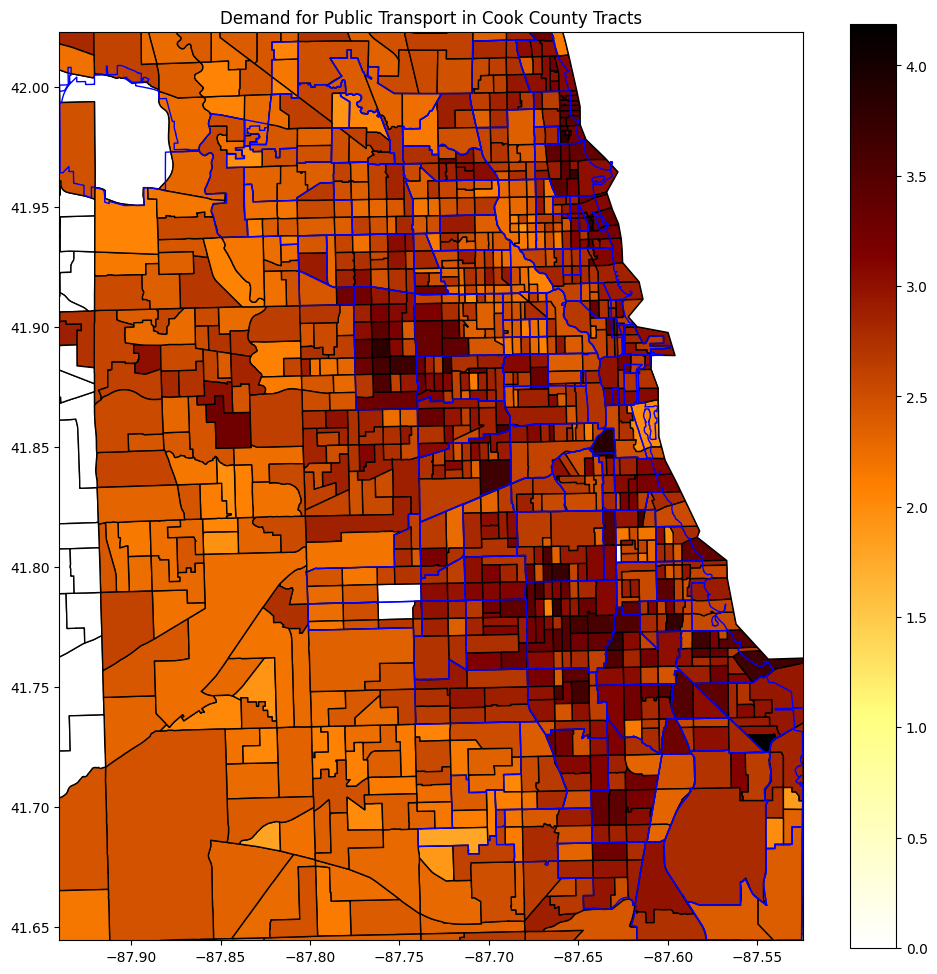

In [8]:
# Load Chicago Tract Shapefile
chicago_tracts = gpd.read_file('/Users/annekebrouwer/Documents/GEOG490_venv/Transportation-Access-/data/tl_2021_17_tract/tl_2021_17_tract.shp')

# Load the city boundary shapefile
city_boundary = gpd.read_file('/Users/annekebrouwer/Documents/GEOG490_venv/Transportation-Access-/data/Boundaries - Neighborhoods/geo_export_9b52634b-a3ac-4da6-9030-5b5607cf6b40.shp')

# Get the bounding box of the city
city_bounds = city_boundary.total_bounds

# Define the bounding box for Cook County
cook_county_extent = (-88.3, -87.2, 41.4, 42.1)

# Filter chicago_tracts to just the extent of Cook County
cook_county_tracts = chicago_tracts.cx[cook_county_extent[0]:cook_county_extent[1], cook_county_extent[2]:cook_county_extent[3]]

# Merge demographic data with filtered tract shapefile
cook_county_tracts = cook_county_tracts.merge(data, left_on='TRACTCE', right_on='tract', how='left')

# Normalize Data
cols_to_normalize = ['Percent_non_white', 'Percent_Households_with_Own_Children_Under_18',
                     'Percent_Households_with_One_or_More_People_65_and_Over',
                     'Percent_Speak_Other_Languages', 'Percent_Total_With_Disability',
                     'Percent_Zero_vehicles_available', 'Percent_Employed',
                     'Percent_Commute_Public_Transportation']

cook_county_tracts[cols_to_normalize] = cook_county_tracts[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Calculate Overall Demand Score
cook_county_tracts['Demand_Score'] = cook_county_tracts[cols_to_normalize].sum(axis=1)

# Plot Overlay Map
fig, ax = plt.subplots(figsize=(12, 12))
cook_county_tracts.plot(column='Demand_Score', cmap='afmhot_r', ax=ax, edgecolor='black', legend=True)

# Set the extent of the map to the city's boundaries
ax.set_xlim(city_bounds[0], city_bounds[2])
ax.set_ylim(city_bounds[1], city_bounds[3])

# Add the city boundaries to the map
city_boundary.plot(ax=ax, color='none', edgecolor='blue')
plt.title('Demand for Public Transport in Cook County Tracts')
# Show the map
plt.show()




/var/folders/k0/h5py5g_54n59fry_574rv1h40000gp/T/ipykernel_55891/3169234674.py:11: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  chicago_tracts_clipped = gpd.clip(chicago_tracts, city_boundary.geometry)


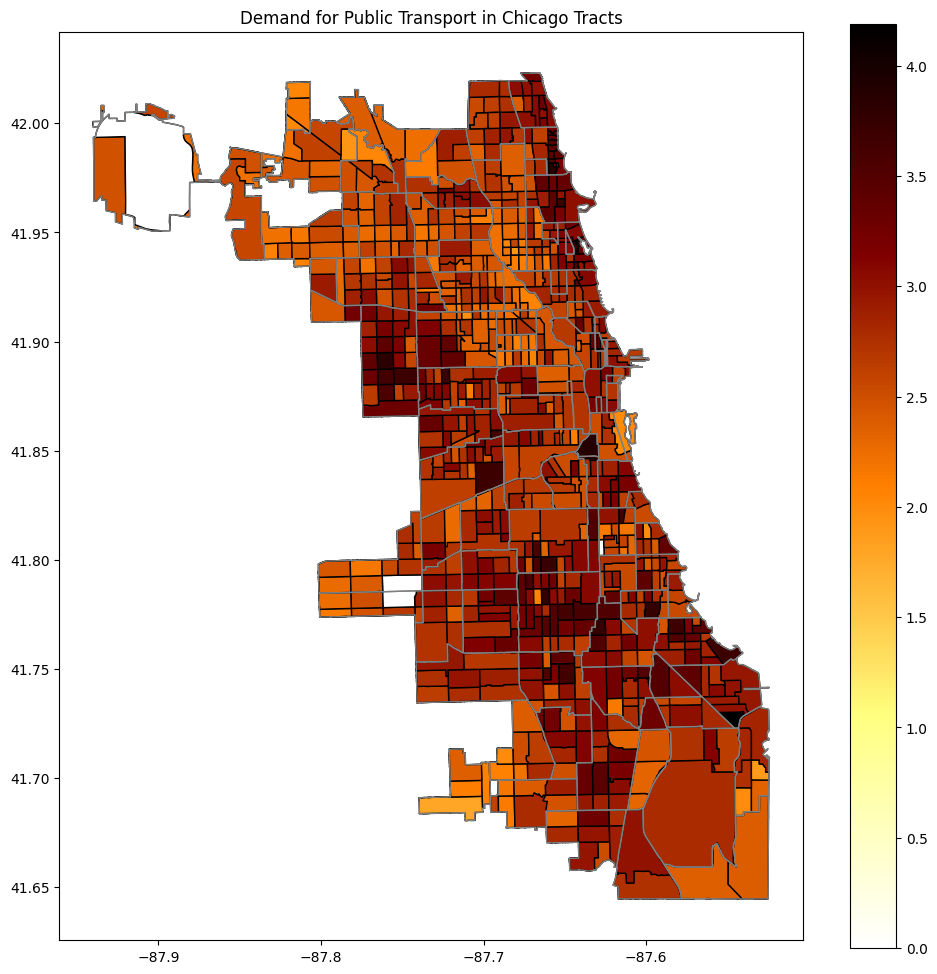

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load Chicago Tract Shapefile
chicago_tracts = gpd.read_file('/Users/annekebrouwer/Documents/GEOG490_venv/Transportation-Access-/data/tl_2021_17_tract/tl_2021_17_tract.shp')

# Load the city boundary shapefile
city_boundary = gpd.read_file('/Users/annekebrouwer/Documents/GEOG490_venv/Transportation-Access-/data/Boundaries - Neighborhoods/geo_export_9b52634b-a3ac-4da6-9030-5b5607cf6b40.shp')

# Clip tracts to city boundary
chicago_tracts_clipped = gpd.clip(chicago_tracts, city_boundary.geometry)

# Merge demographic data with clipped tract shapefile
chicago_tracts_clipped = chicago_tracts_clipped.merge(data, left_on='TRACTCE', right_on='tract', how='left')

# Normalize Data
cols_to_normalize = ['Percent_non_white', 'Percent_Households_with_Own_Children_Under_18',
                     'Percent_Households_with_One_or_More_People_65_and_Over',
                     'Percent_Speak_Other_Languages', 'Percent_Total_With_Disability',
                     'Percent_Zero_vehicles_available', 'Percent_Employed',
                     'Percent_Commute_Public_Transportation']

chicago_tracts_clipped[cols_to_normalize] = chicago_tracts_clipped[cols_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Calculate Overall Demand Score
chicago_tracts_clipped['Demand_Score'] = chicago_tracts_clipped[cols_to_normalize].sum(axis=1)

# Plot Overlay Map
fig, ax = plt.subplots(figsize=(12, 12))
chicago_tracts_clipped.plot(column='Demand_Score', cmap='afmhot_r', ax=ax, edgecolor='black', legend=True)

# Add the city boundaries to the map
city_boundary.plot(ax=ax, color='none', edgecolor='gray')
plt.title('Demand for Public Transport in Chicago Tracts')
# Show the map
plt.show()


In [6]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt


# Ensure that the geometries are in the same CRS
cook_county_tracts = cook_county_tracts.to_crs(city_boundary.crs)

# Perform spatial join to get the average demand score for each neighborhood
neighborhood_demand = gpd.sjoin(cook_county_tracts, city_boundary, op='within').groupby('pri_neigh')['Demand_Score'].mean().reset_index()

# Merge the average demand score back to the city_boundary dataframe
city_boundary = city_boundary.merge(neighborhood_demand, left_on='pri_neigh', right_on='pri_neigh', how='left')

# Plot the neighborhoods with the average demand score
fig, ax = plt.subplots(figsize=(12, 12))
city_boundary.plot(column='Demand_Score', cmap='afmhot_r', ax=ax, legend=True)

# Plot the city_boundary shapefile on top
city_boundary.boundary.plot(ax=ax, color='black', linewidth=1)

plt.title('Average Demand Score by Neighborhood')
plt.show()

NameError: name 'cook_county_tracts' is not defined

In [2]:
data.columns

Index(['Total_Population', 'White', 'Black', 'Native_American_Alaska_Native',
       'Asian', 'Native_Hawaiian_Pacific_Islander', 'Other',
       'Two_or_more_races', 'Median_Household_Income', 'Labor_Force',
       'Total_Commute', 'Commute_Drove_Alone', 'Commute_Public_Transportation',
       'Median_Gross_Rent', 'US_Citizen', 'Not_a_US_Citizen',
       'Education_status', 'Total_Population_25_and_Over', 'Male_Total',
       'Female_Total', 'Male_High_School_Graduate',
       'Female_High_School_Graduate', 'Male_Bachelor_Degree',
       'Female_Bachelor_Degree', 'Male_Master_Degree', 'Female_Master_Degree',
       'B11005_001E', 'Households_with_Own_Children_Under_18',
       'Married_Couple_Families_with_Own_Children_Under_18',
       'Male_Householder_with_Own_Children_Under_18',
       'Female_Householder_with_Own_Children_Under_18', 'B11007_001E',
       'Households_with_One_or_More_People_65_and_Over',
       'Family_Households_with_One_or_More_People_65_and_Over',
       'Nonfa